# Assignment 5.2

Brandon Sams

01Oct2020

## Loading the Reuters dataset

In [1]:
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

## Decoding newswires back to text

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
train_labels[10]

3

## Encoding the data

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [9]:
x_train = vectorize_sequences(train_data)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [10]:
x_test = vectorize_sequences(test_data)

In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [12]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
from keras.utils.np_utils import to_categorical

In [14]:
one_hot_train_labels2 = to_categorical(train_labels)
one_hot_test_labels2 = to_categorical(test_labels)

In [15]:
one_hot_train_labels == one_hot_train_labels2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [16]:
one_hot_test_labels == one_hot_test_labels2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

## Model definition

In [17]:
from keras import models
from keras import layers

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

## Compiling the model

In [19]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

## Setting aside a validation set

In [20]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Training the model

In [21]:
history = model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=512,
         validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 46ms/step - loss: 2.6325 - accuracy: 0.5510 - val_loss: 1.6695 - val_accuracy: 0.6560
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.3669 - accuracy: 0.7095 - val_loss: 1.2558 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 0.9998 - accuracy: 0.7851 - val_loss: 1.0821 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.7834 - accuracy: 0.8346 - val_loss: 1.0037 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6236 - accuracy: 0.8696 - val_loss: 0.9357 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4985 - accuracy: 0.8959 - val_loss: 0.8973 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4002 - accuracy: 0.9173 - val_loss: 0.9002 - val_accuracy: 0.8110
Epoch 8/20
16

## Plotting the training and validation loss

In [22]:
import matplotlib.pyplot as plt

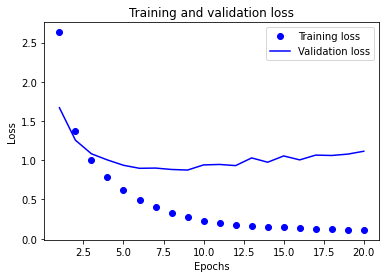

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Plotting the training and validation accuracy

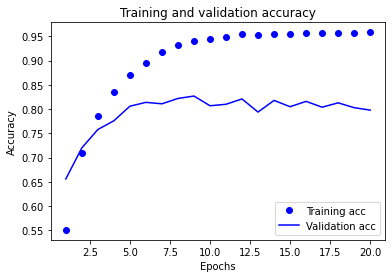

In [24]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Retraining a model from scratch

In [25]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 0s 19ms/step - loss: 2.6176 - accuracy: 0.5497 - val_loss: 1.7611 - val_accuracy: 0.6490
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.4284 - accuracy: 0.7015 - val_loss: 1.3209 - val_accuracy: 0.7210
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.0630 - accuracy: 0.7739 - val_loss: 1.1333 - val_accuracy: 0.7560
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.8338 - accuracy: 0.8195 - val_loss: 1.0294 - val_accuracy: 0.7800
Epoch 5/9
16/16 [==============================] - 0s 17ms/step - loss: 0.6608 - accuracy: 0.8596 - val_loss: 0.9784 - val_accuracy: 0.7980
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5323 - accuracy: 0.8876 - val_loss: 0.9356 - val_accuracy: 0.7960
Epoch 7/9
16/16 [==============================] - 0s 18ms/step - loss: 0.4263 - accuracy: 0.9116 - val_loss: 0.8940 - val_accuracy: 0.8050
Epoch 8/9
16/16 [===

In [26]:
results

[0.9912168979644775, 0.7871772050857544]

## Generating predictions on new data

In [27]:
predictions = model.predict(x_test)

In [28]:
predictions[0].shape

(46,)

In [29]:
np.sum(predictions[0])

0.99999994

In [30]:
np.argmax(predictions[0])

3

In [31]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [32]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

## A model with an information bottleneck

In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 3.3417 - accuracy: 0.4009 - val_loss: 3.0469 - val_accuracy: 0.4880
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 2.8512 - accuracy: 0.3934 - val_loss: 2.7813 - val_accuracy: 0.2810
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 2.5179 - accuracy: 0.2772 - val_loss: 2.4739 - val_accuracy: 0.2830
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.9670 - accuracy: 0.4124 - val_loss: 1.8134 - val_accuracy: 0.5960
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 1.3790 - accuracy: 0.6342 - val_loss: 1.5331 - val_accuracy: 0.6070
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 1.2074 - accuracy: 0.6566 - val_loss: 1.5395 - val_accuracy: 0.6150
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 1.1132 - accuracy: 0.6853 - val_loss: 1.5188 - val_accuracy: 0.6500
Epoch 8/20
63/6